### Steps:
### 1. Import Libraries

In [8]:
import numpy as np
from sklearn import svm
from matplotlib import pyplot

### 2. Define the classes 

In [9]:
C = [ [2,6], [1 ,1], [3 ,4], [3 ,2], [-4 ,8], [-1, 3], [2, 2], [-5, -7], [-2, -3], [-1, -2], [3, -7], [1, -3]]
Y = [0,0,0,0,0,0,0,1,1,1,1,1]
C1= np.asarray(C)
Y1= np.asarray(Y)
print(C1,Y1)

[[ 2  6]
 [ 1  1]
 [ 3  4]
 [ 3  2]
 [-4  8]
 [-1  3]
 [ 2  2]
 [-5 -7]
 [-2 -3]
 [-1 -2]
 [ 3 -7]
 [ 1 -3]] [0 0 0 0 0 0 0 1 1 1 1 1]


### 3. SVM model

In [10]:
model = svm.SVC(kernel='linear', C=1000)
model.fit(C1, Y1)
bias = model.intercept_[0]

### 4. Print the support vectors

In [18]:
print(C1[:,0])

print("Support Vectors:",model.support_vectors_)
print("Number of support vectors in each class:",model.n_support_)
print("Weights: ",model.coef0)

[ 2  1  3  3 -4 -1  2 -5 -2 -1  3  1]
Support Vectors: [[ 1.  1.]
 [-1. -2.]
 [ 1. -3.]]
Number of support vectors in each class: [1 2]
Weights:  0.0


### 5. Plot the model

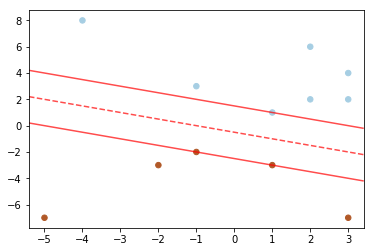

weights:  [-0.24994083 -0.49988166]
a -0.4999999999999999
margin: 1.7892778797228428


In [21]:
pyplot.scatter(C1[:, 0], C1[:, 1], c=Y1, s=30, cmap=pyplot.cm.Paired)

aX = pyplot.gca()
xLimit = aX.get_xlim()
yLimit = aX.get_ylim()

x = np.linspace(xLimit[0], xLimit[1], 30)       #defining the hyperplanes                  
y = np.linspace(yLimit[0], yLimit[1], 30)
Y, X = np.meshgrid(y, x)
xy = np.vstack([X.ravel(), Y.ravel()]).T
Z = model.decision_function(xy).reshape(X.shape)


aX.contour(X, Y, Z, colors='r', levels=[-1, 0, 1], alpha=0.7, linestyles=['-', '--', '-']) # plot decision boundary and margins


aX.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=90,linewidth=1, facecolors='none')
pyplot.show()                                        # plot support vectors


# weights and margin
w = model.coef_[0]
a = -w[0] / w[1]
x = np.linspace(-7, 7)

y = a * x - (model.intercept_[0]) / w[1]
margin = 1 / np.sqrt(np.sum(model.coef_ ** 2)) #equation of maximum margin


print("weights: ",w)

print("a",a)

print("margin:",margin)  #length of maximum margin
